### Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("covid-Confirmed dataset.csv")
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900


In [3]:
data.shape

(468, 62)

### Analysis for Infection Total Number

In [4]:
data1 = pd.concat([data.iloc[:,1], data.iloc[:,4:]], axis = 1)

country = list(data1['Country/Region'].unique())
sum_data = pd.DataFrame(columns = data1.columns)

##get the total number of cases by date for each country/region
for name in country:
    sum_data.loc[name] = data1[data1['Country/Region'] == name].iloc[:, 1:].apply(lambda x: x.sum())

sum_data = sum_data.drop(columns = ['Country/Region']).apply(lambda x: x.astype('int64'))

total_by_country = sum_data.transpose()
total_by_country.head()

,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Cambodia,Sri Lanka,Germany,...,Kyrgyzstan,Mauritius,Zambia,Djibouti,"Gambia, The","Bahamas, The",Chad,El Salvador,Fiji,Nicaragua
1/22/20,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,5,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,7,2,3,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,8,4,4,1,4,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


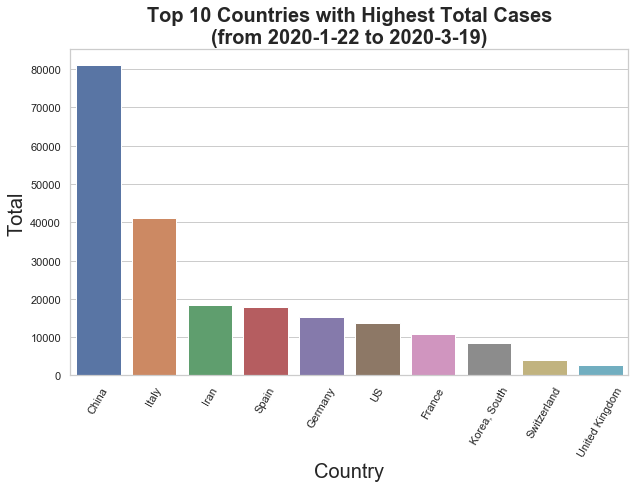

In [5]:
#Visualize the top 10 countries in the period
total_copy = total_by_country.iloc[-1, :]
top_10 = total_copy.sort_values(ascending = False)[0:10]
top_10 = pd.DataFrame(top_10).reset_index()
top_10.columns = ['Country', 'Total']

plt.figure(figsize = (10,6))
sns.set(style = "whitegrid")
ax = sns.barplot(top_10['Country'], top_10['Total'])
plt.xticks(rotation = 60)
ax.set_title('Top 10 Countries with Highest Total Cases\n(from 2020-1-22 to 2020-3-19)',fontsize = 20, fontweight = "bold")
ax.set_xlabel('Country',fontsize = 20)
ax.set_ylabel('Total',fontsize = 20)
plt.show()

In [6]:
#Analysis for total cases trend by date in China, Italy, Iran, US and Korean
sample_countries = total_by_country[['China', 'Italy', 'Iran', 'US' ,'Korea, South']]
sample_countries = sample_countries.reset_index()
sample_countries.columns = ['Date', 'China', 'Italy', 'Iran', 'US' ,'South Korea']

sample_countries['Date'] = sample_countries['Date'] + '20'
sample_countries['Date'] = pd.to_datetime(sample_countries['Date'], format='%m/%d/%Y')
sample_countries.head()

,Date,China,Italy,Iran,US,South Korea
0,2020-01-22,548,0,0,1,1
1,2020-01-23,643,0,0,1,1
2,2020-01-24,920,0,0,2,2
3,2020-01-25,1406,0,0,2,2
4,2020-01-26,2075,0,0,5,3


/Users/mac/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


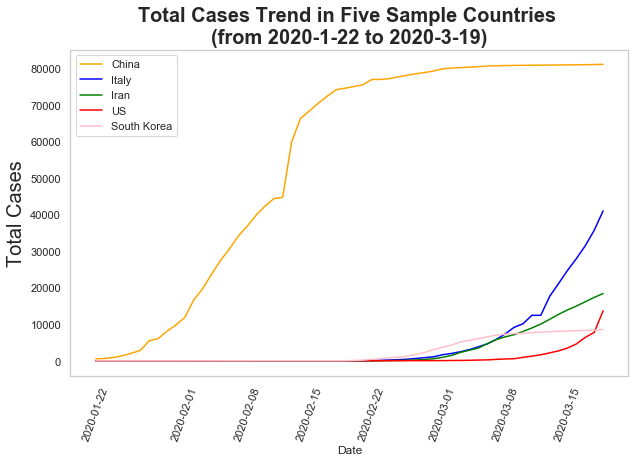

In [7]:
#Visualize the trend in the five countries
plt.figure(figsize = (10,6))

sns.lineplot(sample_countries['Date'], sample_countries['China'], label = "China", color = "Orange")
sns.lineplot(sample_countries['Date'], sample_countries['Italy'], label = "Italy",color = "Blue")
sns.lineplot(sample_countries['Date'], sample_countries['Iran'], label = "Iran",color = "Green")
sns.lineplot(sample_countries['Date'], sample_countries['US'], label = "US",color = "Red")
sns.lineplot(sample_countries['Date'], sample_countries['South Korea'], label = "South Korea", color = "Pink")

plt.title("Total Cases Trend in Five Sample Countries \n(from 2020-1-22 to 2020-3-19)", fontsize = 20, fontweight = "bold")
plt.ylabel("Total Cases", fontsize = 20)
plt.xticks(rotation = 70)
plt.grid()
plt.legend()
plt.show()

Short conclusion:

It can be seen from the line chart that although the overall trend for the five countries is increasing, the trend in China and South Korea is getting slow while that in US and Italy is projected to increase sharply

In [8]:
#Descriptive statistics of each country for total number
total_by_country.describe()

,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Cambodia,Sri Lanka,Germany,...,Kyrgyzstan,Mauritius,Zambia,Djibouti,"Gambia, The","Bahamas, The",Chad,El Salvador,Fiji,Nicaragua
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,46.603448,232.896552,91.172414,0.948276,92.620690,67.896552,72.500000,3.172414,4.568966,1192.534483,...,0.103448,0.103448,0.068966,0.034483,0.051724,0.103448,0.017241,0.017241,0.017241,0.017241
std,48.484014,284.051681,80.064259,0.223404,192.270262,156.652335,139.058898,7.657442,12.010393,3034.563613,...,0.552178,0.552178,0.368118,0.184059,0.223404,0.446808,0.131306,0.131306,0.131306,0.131306
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,22.750000,28.000000,1.000000,12.000000,5.000000,13.250000,1.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,89.000000,84.000000,1.000000,22.000000,8.000000,15.000000,1.000000,1.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46.000000,352.750000,115.250000,1.000000,50.000000,36.000000,54.250000,1.000000,1.000000,427.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,272.000000,924.000000,345.000000,1.000000,900.000000,800.000000,681.000000,37.000000,60.000000,15320.000000,...,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Define a function to get the start day
def get_first_day(df):
    count = 0
    for index in df.index:
        if df.iloc[count, 0] != 0:
            break
        count += 1
    return(index)

In [10]:
#Get the first day for each country
dic = {}
for name in country:
    temp_df = pd.DataFrame(sum_data.loc[name,:])
    dic[name] = get_first_day(temp_df)
    
day_1 = pd.DataFrame.from_dict(dic, orient = 'index')
day_1 = day_1.reset_index()
day_1.columns = ['Country', 'First Day']
day_1.head()

,Country,First Day
0,Thailand,1/22/20
1,Japan,1/22/20
2,Singapore,1/23/20
3,Nepal,1/25/20
4,Malaysia,1/25/20


### Analysis for Mortality Rate (Overall)

In [11]:
death_data = pd.read_csv("covid-Deaths.csv")
death_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,10,15,16,19,22,22,27,29,29,29
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2


In [12]:
death_data.shape

(468, 62)

In [13]:
death_data1 = pd.concat([death_data.iloc[:,1], death_data.iloc[:,4:]], axis = 1)

country = list(death_data1['Country/Region'].unique())
death_sum_data = pd.DataFrame(columns = death_data1.columns)

##get the total number of death cases by date for each country/region
for name in country:
    death_sum_data.loc[name] = death_data1[death_data1['Country/Region'] == name].iloc[:, 1:].apply(lambda x: x.sum())

death_sum_data = death_sum_data.drop(columns = ['Country/Region']).apply(lambda x: x.astype('int64'))

death_total = death_sum_data.transpose()
death_total.head()

,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Cambodia,Sri Lanka,Germany,...,Kyrgyzstan,Mauritius,Zambia,Djibouti,"Gambia, The","Bahamas, The",Chad,El Salvador,Fiji,Nicaragua
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Get mortality rate for each country
death_total_copy = pd.DataFrame(death_total.iloc[-1, :]).reset_index()
death_total_copy.columns = ['Country', 'Death Total']

total_copy = total_copy.reset_index()
total_copy.columns = ['Country', 'Total']

In [15]:
death_rate = pd.concat([death_total_copy, total_copy.iloc[:, 1]], axis = 1)
death_rate['Mortality Rate%'] = 100*(death_rate['Death Total']/death_rate['Total'])
death_rate.head()

,Country,Death Total,Total,Mortality Rate%
0,Thailand,1,272,0.367647
1,Japan,29,924,3.138528
2,Singapore,0,345,0.000000
3,Nepal,0,1,0.000000
4,Malaysia,2,900,0.222222


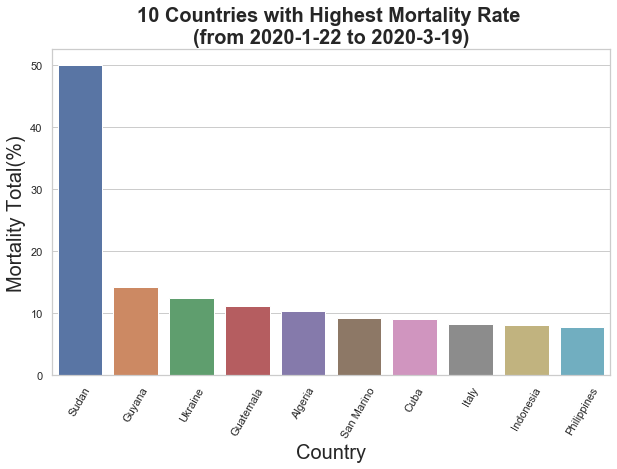

In [16]:
#Visualize top 10 counntries with highest mortality rate
death_top_10 = death_rate.sort_values(by = 'Mortality Rate%', ascending = False)[0:10]

plt.figure(figsize = (10,6))
sns.set(style = "whitegrid")
ax = sns.barplot(death_top_10['Country'], death_top_10['Mortality Rate%'])
plt.xticks(rotation = 60)
ax.set_title('10 Countries with Highest Mortality Rate \n(from 2020-1-22 to 2020-3-19)',fontsize = 20, fontweight = "bold")
ax.set_xlabel('Country',fontsize = 20)
ax.set_ylabel('Mortality Total(%)',fontsize = 20)
plt.show()

Short Comparison:

Based on the comparision between the top 10 total cases and death cases above, it is clear that although developed countries/regions share a higher total number of cases, the mortality rates are much more higher in less developed areas except Italy

### Analysis for Recover Rate (Overall)

In [17]:
recover_data = pd.read_csv("covid-Recovered.csv")
recover_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,33,34,34,35,35,35,35,41,42,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,101,118,118,118,118,118,144,144,144,150
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,96,96,97,105,105,109,114,114,114
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,24,26,26,26,35,42,42,49,60,75


In [18]:
recover_data.shape

(468, 62)

In [19]:
recover_data1 = pd.concat([recover_data.iloc[:,1], recover_data.iloc[:,4:]], axis = 1)

country = list(recover_data1['Country/Region'].unique())
recover_sum_data = pd.DataFrame(columns = recover_data1.columns)

##get the total number of recover cases by date for each country/region
for name in country:
    recover_sum_data.loc[name] = recover_data1[recover_data1['Country/Region'] == name].iloc[:, 1:].apply(lambda x: x.sum())

recover_sum_data = recover_sum_data.drop(columns = ['Country/Region']).apply(lambda x: x.astype('int64'))

recover_total = recover_sum_data.transpose()
recover_total.head()

,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Cambodia,Sri Lanka,Germany,...,Kyrgyzstan,Mauritius,Zambia,Djibouti,"Gambia, The","Bahamas, The",Chad,El Salvador,Fiji,Nicaragua
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Get recover rate for each country
recover_total_copy = pd.DataFrame(recover_total.iloc[-1, :]).reset_index()
recover_total_copy.columns = ['Country', 'Recover Total']

recover_rate = pd.concat([recover_total_copy, total_copy.iloc[:, 1]], axis = 1)
recover_rate['Recover Rate%'] = 100*(recover_rate['Recover Total']/death_rate['Total'])
recover_rate.head()

,Country,Recover Total,Total,Recover Rate%
0,Thailand,42,272,15.441176
1,Japan,150,924,16.233766
2,Singapore,114,345,33.043478
3,Nepal,1,1,100.000000
4,Malaysia,75,900,8.333333


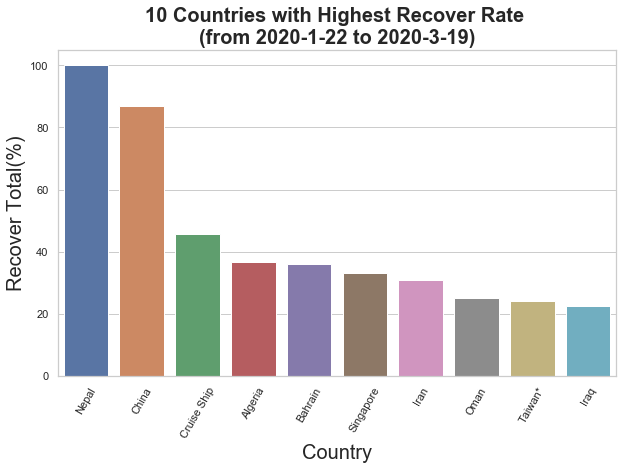

In [21]:
#Visualize top 10 counntries with highest recover rate
recover_top_10 = recover_rate.sort_values(by = 'Recover Rate%', ascending = False)[0:10]

plt.figure(figsize = (10,6))
sns.set(style = "whitegrid")
ax = sns.barplot(recover_top_10['Country'], recover_top_10['Recover Rate%'])
plt.xticks(rotation = 60)
ax.set_title('10 Countries with Highest Recover Rate \n(from 2020-1-22 to 2020-3-19)',fontsize = 20, fontweight = "bold")
ax.set_xlabel('Country',fontsize = 20)
ax.set_ylabel('Recover Total(%)',fontsize = 20)
plt.show()

Short Conclusion:
    
As can be shown from the chart above, regions with higher total infection cases are not necessarily a bad signal. Countries like China and Iran also share a higher recover rate.

### Analysis for Provinces in China

In [22]:
data_China = data[data['Country/Region'] == 'China']
data_China.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
154,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67760,67773,67781,67786,67790,67794,67798,67799,67800,67800
158,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1353,1356,1356,1356,1356,1360,1361,1364,1370,1378
159,Henan,China,33.8820,113.6140,5,5,9,32,83,128,...,1272,1273,1273,1273,1273,1273,1273,1273,1273,1273
160,Zhejiang,China,29.1832,120.0934,10,27,43,62,104,128,...,1215,1215,1215,1215,1227,1231,1231,1232,1232,1233
161,Hunan,China,27.6104,111.7088,4,9,24,43,69,100,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018


In [23]:
data_China.shape

(33, 62)

In [24]:
province_China = pd.concat([data_China.iloc[:,0], data_China.iloc[:,4:]], axis = 1)
province_China.set_index(["Province/State"], inplace = True)

total_by_province = province_China.transpose()
total_by_province.head()

Province/State,Hubei,Guangdong,Henan,Zhejiang,Hunan,Anhui,Jiangxi,Shandong,Jiangsu,Chongqing,...,Gansu,Hong Kong,Liaoning,Jilin,Xinjiang,Inner Mongolia,Ningxia,Qinghai,Macau,Tibet
1/22/20,444,26,5,10,4,1,2,2,1,6,...,0,0,2,0,0,0,1,0,1,0
1/23/20,444,32,5,27,9,9,7,6,5,9,...,2,2,3,1,2,0,1,0,2,0
1/24/20,549,53,9,43,24,15,18,15,9,27,...,2,2,4,3,2,1,2,0,2,0
1/25/20,761,78,32,62,43,39,18,27,18,57,...,4,5,17,4,3,7,3,1,2,0
1/26/20,1058,111,83,104,69,60,36,46,33,75,...,7,8,21,4,4,7,4,1,5,0


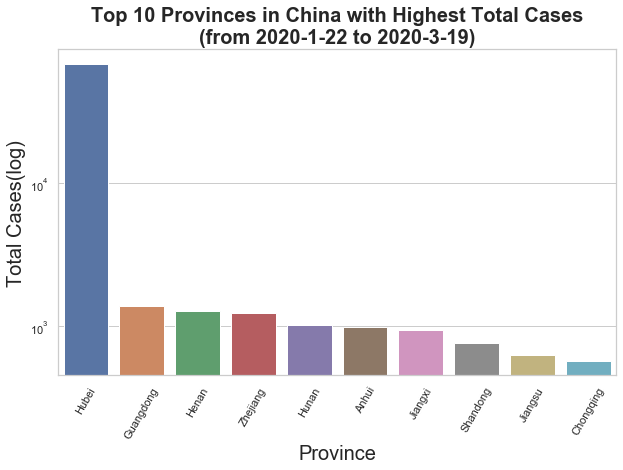

In [25]:
#Visualize the top 10 provinces in China (Total Cases)
province_copy = total_by_province.iloc[-1, :]
top_10_province = province_copy.sort_values(ascending = False)[0:10]
top_10_province = pd.DataFrame(top_10_province).reset_index()
top_10_province.columns = ['Province', 'Total']

plt.figure(figsize = (10,6))
sns.set(style = "whitegrid")
ax = sns.barplot(top_10_province['Province'], top_10_province['Total'])
ax.set_yscale('log')
plt.xticks(rotation = 60)
ax.set_title('Top 10 Provinces in China with Highest Total Cases\n(from 2020-1-22 to 2020-3-19)',fontsize = 20, fontweight = "bold")
ax.set_xlabel('Province',fontsize = 20)
ax.set_ylabel('Total Cases(log)',fontsize = 20)
plt.show()

Short Conclusion:

It can be seen from the chart above that the southern part in China suffers more than the northern part, since most provinces are located in the sourthern part except Shandong.

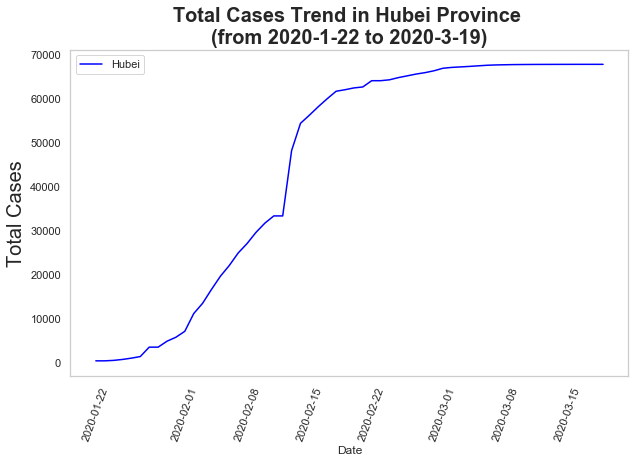

In [26]:
#Visualize the total cases trend in Hubei province
Hubei_total = total_by_province['Hubei']
Hubei_total = Hubei_total.reset_index()
Hubei_total.columns = ['Date', 'Hubei']

Hubei_total['Date'] = Hubei_total['Date'] + '20'
Hubei_total['Date'] = pd.to_datetime(Hubei_total['Date'], format='%m/%d/%Y')

plt.figure(figsize = (10,6))

sns.lineplot(Hubei_total['Date'], Hubei_total['Hubei'], label = "Hubei", color = "Blue")

plt.title("Total Cases Trend in Hubei Province \n(from 2020-1-22 to 2020-3-19)", fontsize = 20, fontweight = "bold")
plt.ylabel("Total Cases", fontsize = 20)
plt.xticks(rotation = 70)
plt.grid()
plt.legend()
plt.show()

Short Conclusion:
    
It can be seen although Hubei Province experienced a sharp increase in the begining period, the situation is becoming under control now.

In [27]:
#Visualize the top 10 provinces with the highest mortality rate in China
China_death = death_data[death_data['Country/Region'] == 'China']
China_death = pd.concat([China_death.iloc[:,0], China_death.iloc[:,4:]], axis = 1)
China_death.set_index(["Province/State"], inplace = True)

China_death_total = China_death.transpose()
China_death_total = pd.DataFrame(China_death_total.iloc[-1, :]).reset_index()
China_death_total.columns = ['Province', 'Death Total']

province_copy = pd.DataFrame(province_copy).reset_index()
province_copy.columns = ['Province/State', 'Total']

China_death_rate = pd.concat([China_death_total, province_copy.iloc[:, 1]], axis = 1)
China_death_rate['Mortality Rate%'] = 100*(China_death_rate['Death Total']/province_copy['Total'])
China_death_rate.head()

,Province,Death Total,Total,Mortality Rate%
0,Hubei,3130,67800,4.616519
1,Guangdong,8,1378,0.580552
2,Henan,22,1273,1.728201
3,Zhejiang,1,1233,0.081103
4,Hunan,4,1018,0.392927


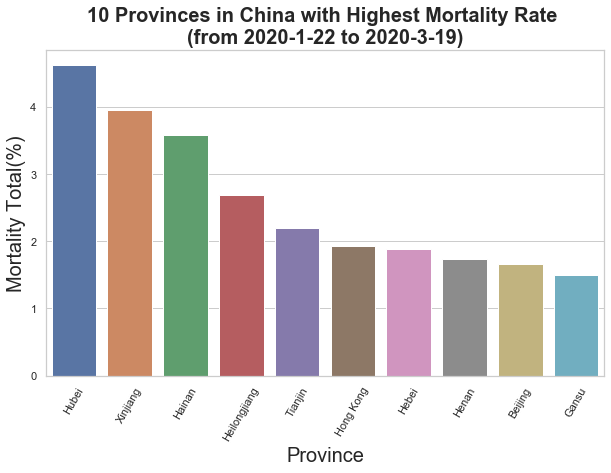

In [28]:
#Visualize top 10 provinces with highest mortality rate
China_death = China_death_rate.sort_values(by = 'Mortality Rate%', ascending = False)[0:10]

plt.figure(figsize = (10,6))
sns.set(style = "whitegrid")
ax = sns.barplot(China_death['Province'], China_death['Mortality Rate%'])
plt.xticks(rotation = 60)
ax.set_title('10 Provinces in China with Highest Mortality Rate \n(from 2020-1-22 to 2020-3-19)',fontsize = 20, fontweight = "bold")
ax.set_xlabel('Province',fontsize = 20)
ax.set_ylabel('Mortality Total(%)',fontsize = 20)
plt.show()

In [29]:
#Visualize the top 10 provinces with the lowest recover rate in China
China_recover = recover_data[recover_data['Country/Region'] == 'China']
China_recover = pd.concat([China_recover.iloc[:,0], China_recover.iloc[:,4:]], axis = 1)
China_recover.set_index(["Province/State"], inplace = True)

China_recover_total = China_recover.transpose()
China_recover_total = pd.DataFrame(China_recover_total.iloc[-1, :]).reset_index()
China_recover_total.columns = ['Province', 'Recover Total']

China_recover_rate = pd.concat([China_recover_total, province_copy.iloc[:, 1]], axis = 1)
China_recover_rate['Recover Rate%'] = 100*(China_recover_rate['Recover Total']/province_copy['Total'])
China_recover_rate.head()

,Province,Recover Total,Total,Recover Rate%
0,Hubei,57682,67800,85.076696
1,Guangdong,1318,1378,95.645864
2,Henan,1250,1273,98.193244
3,Zhejiang,1217,1233,98.702352
4,Hunan,1014,1018,99.607073


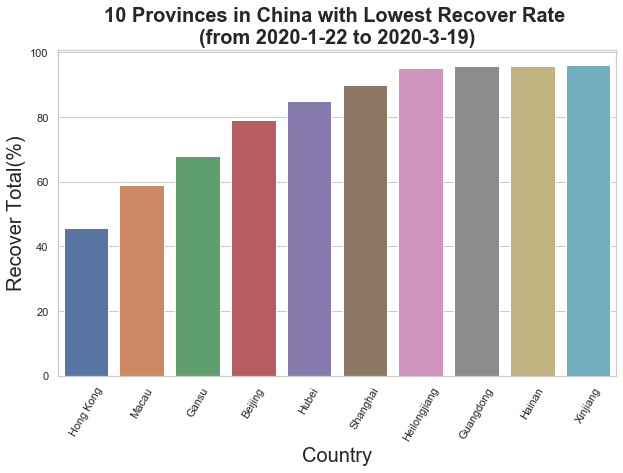

In [30]:
China_recover = China_recover_rate.sort_values(by = 'Recover Rate%', ascending = True)[0:10]

plt.figure(figsize = (10,6))
sns.set(style = "whitegrid")
ax = sns.barplot(China_recover['Province'], China_recover['Recover Rate%'])
plt.xticks(rotation = 60)
ax.set_title('10 Provinces in China with Lowest Recover Rate \n(from 2020-1-22 to 2020-3-19)',fontsize = 20, fontweight = "bold")
ax.set_xlabel('Country',fontsize = 20)
ax.set_ylabel('Recover Total(%)',fontsize = 20)
plt.show()

Short Conclusion:
    
The overall situation in China is more and more stable, with lower mortality rate and relatively high recover rate. Hong Kong and Macau might need assistance in recovering process according to the chart above.

### Analysis for States in US

In [31]:
data_US = data[data['Country/Region'] == 'US']
data_US.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,267,366,442,568,572,643,904,1076,1014,1376
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,173,220,328,421,525,732,967,1706,2495,5365
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,144,177,221,282,340,426,557,698,751,952
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,92,95,108,123,138,164,197,218,218,328
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,46,46,46,46,46,46,47,47,47,47


In [32]:
data_US.shape

(247, 62)

In [33]:
State_US = pd.concat([data_US.iloc[:,0], data_US.iloc[:,4:]], axis = 1)
State_US.set_index(["Province/State"], inplace = True)

total_by_state = State_US.transpose()
total_by_state.head()

Province/State,Washington,New York,California,Massachusetts,Diamond Princess,Grand Princess,Georgia,Colorado,Florida,New Jersey,...,"Bon Homme, SD","Socorro, NM","Bernalillo, NM","Oakland, MI","Wayne, MI","New Castle, DE",Alabama,Puerto Rico,Guam,Virgin Islands
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


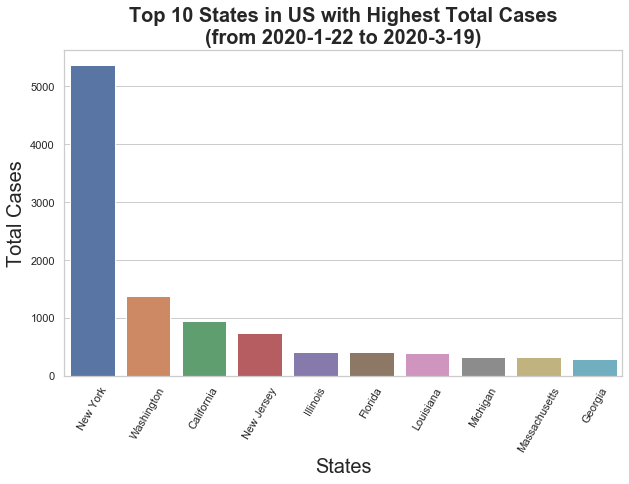

In [34]:
#Visualize the top 10 states in US 
state_copy = total_by_state.iloc[-1, :]
top_10_state = state_copy.sort_values(ascending = False)[0:10]
top_10_state = pd.DataFrame(top_10_state).reset_index()
top_10_state.columns = ['State', 'Total']

plt.figure(figsize = (10,6))
sns.set(style = "whitegrid")
ax = sns.barplot(top_10_state['State'], top_10_state['Total'])
# ax.set_yscale('log')
plt.xticks(rotation = 60)
ax.set_title('Top 10 States in US with Highest Total Cases\n(from 2020-1-22 to 2020-3-19)',fontsize = 20, fontweight = "bold")
ax.set_xlabel('States',fontsize = 20)
ax.set_ylabel('Total Cases',fontsize = 20)
plt.show()

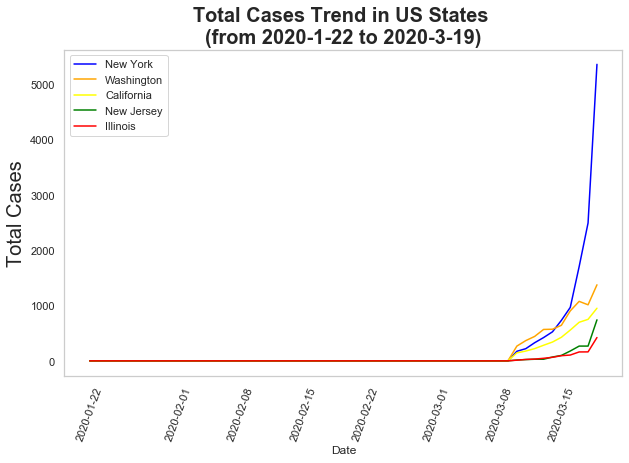

In [35]:
#Visualize the trend in the five provinces
state_total = total_by_state[['New York','Washington', 'California', 'New Jersey', 'Illinois']]
state_total = state_total.reset_index()
state_total.columns = ['Date', 'New York','Washington', 'California', 'New Jersey', 'Illinois']

state_total['Date'] = state_total['Date'] + '20'
state_total['Date'] = pd.to_datetime(state_total['Date'], format='%m/%d/%Y')

plt.figure(figsize = (10,6))

sns.lineplot(state_total['Date'], state_total['New York'], label = "New York", color = "Blue")
sns.lineplot(state_total['Date'], state_total['Washington'], label = "Washington", color = "Orange")
sns.lineplot(state_total['Date'], state_total['California'], label = "California", color = "Yellow")
sns.lineplot(state_total['Date'], state_total['New Jersey'], label = "New Jersey", color = "Green")
sns.lineplot(state_total['Date'], state_total['Illinois'], label = "Illinois", color = "Red")

plt.title("Total Cases Trend in US States \n(from 2020-1-22 to 2020-3-19)", fontsize = 20, fontweight = "bold")
plt.ylabel("Total Cases", fontsize = 20)
plt.xticks(rotation = 70)
plt.grid()
plt.legend()
plt.show()

Short Conclusion:
    
It can be seen US is in the urgent situation since all sample states share a sharp growth recently. There is a good reason to believe that the breakout should be within one month.

In [36]:
#Visualize the top 10 states with the highest mortality rate in US
US_death = death_data[death_data['Country/Region'] == 'US']
US_death = pd.concat([US_death.iloc[:,0], US_death.iloc[:,4:]], axis = 1)
US_death.set_index(["Province/State"], inplace = True)

US_death_total = US_death.transpose()
US_death_total = pd.DataFrame(US_death_total.iloc[-1, :]).reset_index()
US_death_total.columns = ['State', 'Death Total']

state_copy = pd.DataFrame(state_copy).reset_index()
state_copy.columns = ['Province/State', 'Total']

US_death_rate = pd.concat([US_death_total, state_copy.iloc[:, 1]], axis = 1)
US_death_rate['Mortality Rate%'] = 100*(US_death_rate['Death Total']/state_copy['Total'])
US_death_rate.head()

,State,Death Total,Total,Mortality Rate%
0,Washington,74,1376,5.377907
1,New York,34,5365,0.633737
2,California,18,952,1.890756
3,Massachusetts,0,328,0.000000
4,Diamond Princess,0,47,0.000000


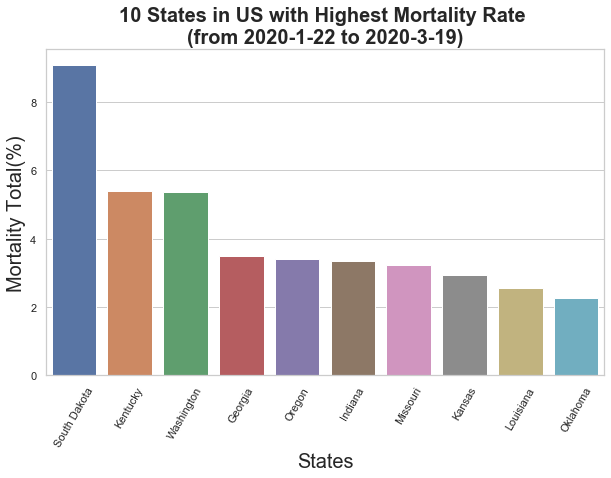

In [37]:
#Visualize top 10 states with highest mortality rate
US_death = US_death_rate.sort_values(by = 'Mortality Rate%', ascending = False)[0:10]

plt.figure(figsize = (10,6))
sns.set(style = "whitegrid")
ax = sns.barplot(US_death['State'], US_death['Mortality Rate%'])
plt.xticks(rotation = 60)
ax.set_title('10 States in US with Highest Mortality Rate \n(from 2020-1-22 to 2020-3-19)',fontsize = 20, fontweight = "bold")
ax.set_xlabel('States',fontsize = 20)
ax.set_ylabel('Mortality Total(%)',fontsize = 20)
plt.show()

In [38]:
#Visualize the top 10 states with the highest mortality rate in US
US_recover = recover_data[recover_data['Country/Region'] == 'US']
US_recover = pd.concat([US_recover.iloc[:,0], US_recover.iloc[:,4:]], axis = 1)
US_recover.set_index(["Province/State"], inplace = True)

US_recover_total = US_recover.transpose()
US_recover_total = pd.DataFrame(US_recover_total.iloc[-1, :]).reset_index()
US_recover_total.columns = ['State', 'Recover Total']

US_recover_rate = pd.concat([US_recover_total, state_copy.iloc[:, 1]], axis = 1)
US_recover_rate['Recover Rate%'] = 100*(US_recover_rate['Recover Total']/state_copy['Total'])
US_recover_rate.head()

,State,Recover Total,Total,Recover Rate%
0,Washington,0,1376,0.0
1,New York,0,5365,0.0
2,California,0,952,0.0
3,Massachusetts,0,328,0.0
4,Diamond Princess,0,47,0.0


In [39]:
US_recover[US_recover.iloc[:, -1] != 0]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
Province/State,,,,,,,,,,,,,,,,,,,,,


Difficulty:

There is something wrong with the recover data in US, since there are no cumulative recover in 3/19/20, which does not comply with the real-world situation. Also some data points are wonky, which may lead to misunderstanding. For example, there are no people in Japan died or recovered, yet the total number of infection in Japan decreases from 1/22/20 to 1/23/20.

In order to further investigate into more concrete comparisons and analysis, I might propose to fix the wonky data first, especially the recover cases in US.